# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [102]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns  ###
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

from sklearn.model_selection import train_test_split

data1 = pd.read_csv("concrete.csv")
data = data1.copy()

In [100]:
# credit.isnull().sum()
data.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [101]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [120]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1:]

x_tr, x_val, y_tr, y_val = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=0.3, random_state=0)

In [123]:
print('train-data',x_train.shape)
print('test-data',x_val.shape)
print('test-data',x_test.shape)
print()
print('train-labels',y_train.shape)
print('train-labels',y_val.shape)
print('test-labels',y_test.shape)

train-data (576, 8)
test-data (206, 8)
test-data (248, 8)

train-labels (576, 1)
train-labels (206, 1)
test-labels (248, 1)


In [124]:
########## Normalization of independent
mean = x_train.mean(axis=0) # taking the mean of 
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_val = (x_test - mean) /std
x_test = (x_test - mean) /std



y_train= np.array(y_train.astype('float32'))
y_val= np.array(y_train.astype('float32'))
y_test= np.array(y_test.astype('float32'))

In [125]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(6,activation='relu'),       
    tf.keras.layers.Dense(1)])### tanh hyperbolic tangent range--1 to 1  similar to sigmoid     
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# model.compile(Adam(lr=0.8)

In [128]:
history = model.fit(x_train, y_train,batch_size=1,epochs=100)
#                     validation_data=(x_val, y_val))


Epoch 1/100
576/576 [==============================] - 1s 882us/step - loss: 491.0942 - mae: 17.3418
Epoch 2/100
576/576 [==============================] - 0s 796us/step - loss: 238.1959 - mae: 12.4046
Epoch 3/100
576/576 [==============================] - 1s 872us/step - loss: 181.5916 - mae: 10.8478
Epoch 4/100
576/576 [==============================] - 1s 883us/step - loss: 167.8376 - mae: 10.3501
Epoch 5/100
576/576 [==============================] - 1s 870us/step - loss: 161.5687 - mae: 10.0316
Epoch 6/100
576/576 [==============================] - 1s 925us/step - loss: 159.8363 - mae: 9.8353
Epoch 7/100
576/576 [==============================] - 0s 780us/step - loss: 157.1874 - mae: 9.7767
Epoch 8/100
576/576 [==============================] - 0s 742us/step - loss: 153.5945 - mae: 9.6231
Epoch 9/100
576/576 [==============================] - 0s 735us/step - loss: 152.7872 - mae: 9.5269
Epoch 10/100
576/576 [==============================] - 0s 770us/step - loss: 147.4950 - mae: 9

576/576 [==============================] - 1s 919us/step - loss: 62.1482 - mae: 6.1090
Epoch 83/100
576/576 [==============================] - 0s 715us/step - loss: 61.2376 - mae: 6.0067
Epoch 84/100
576/576 [==============================] - 0s 711us/step - loss: 60.6731 - mae: 6.0217
Epoch 85/100
576/576 [==============================] - 0s 687us/step - loss: 59.1969 - mae: 5.9211
Epoch 86/100
576/576 [==============================] - 0s 721us/step - loss: 58.3889 - mae: 5.8939
Epoch 87/100
576/576 [==============================] - 0s 724us/step - loss: 57.3988 - mae: 5.7459
Epoch 88/100
576/576 [==============================] - 0s 812us/step - loss: 56.0145 - mae: 5.7702
Epoch 89/100
576/576 [==============================] - 0s 613us/step - loss: 55.2028 - mae: 5.6641
Epoch 90/100
576/576 [==============================] - 0s 637us/step - loss: 54.4811 - mae: 5.6741
Epoch 91/100
576/576 [==============================] - 1s 964us/step - loss: 53.8157 - mae: 5.5456
Epoch 92/100


In [129]:
test_mse, test_mae = model.evaluate(x_test, y_test, verbose=0)

In [130]:
print('mean-square-error',test_mse)
print()
print('mean-absolue-error',test_mae)

mean-square-error 51.25798797607422

mean-absolue-error 5.43641471862793


In [140]:
history_dict.keys()

dict_keys(['loss', 'mae'])

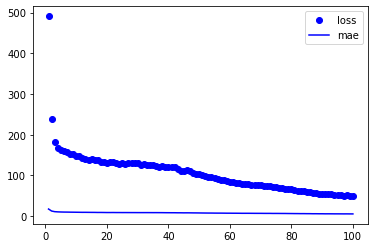

In [142]:
import matplotlib.pyplot as plt
history_dict = history.history

val = history_dict['loss']
val2 = history_dict['mae']

epochs = range(1, len(val) + 1)
plt.plot(epochs, val, 'bo', label='loss')
plt.plot(epochs, val2, 'b', label='mae')
plt.legend()
plt.show()

In [143]:
# predicting the test set results
y_pred = model.predict(x_test)

In [144]:
y_pred[:9]

array([[67.240715],
       [21.94518 ],
       [38.756233],
       [13.338224],
       [21.68167 ],
       [46.192055],
       [42.527824],
       [29.050596],
       [28.805578]], dtype=float32)

In [145]:
y_test[:9]

array([[54.77],
       [24.5 ],
       [47.03],
       [ 9.85],
       [ 6.27],
       [45.84],
       [43.5 ],
       [23.25],
       [38.6 ]], dtype=float32)